<a href="https://colab.research.google.com/github/amit456218/amit456218/blob/main/Copy_of_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%mkdir -p data_set2/{depressed,normal}
%cd /content/

/content


In [10]:
import cv2
import os

with open('normal.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("normal_pics/"+image)
    cv2.imwrite("data_set/normal/"+image,loadedImage)
print("done writing")




done writing


In [84]:
with open('depressed.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("depressed_pics/"+image)
    cv2.imwrite("data_set/depressed/"+image,loadedImage)
print("done writing")


done writing


In [3]:
%mkdir dataset


mkdir: cannot create directory ‘dataset’: File exists


In [4]:
images = []

with open('normal.txt','r') as f:
    images = [line.strip() for line in f]


face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0
for image in images:
    img = cv2.imread("data_set/normal/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
      cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
      count += 1

          # Save the captured image into the datasets folder
      cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
      pass
print("\n Done creating face data")






 Enter Emotion id end press <return> ==>  0

 Done creating face data


In [11]:
images = []

with open('depressed.txt','r') as f:
    images = [line.strip() for line in f]

print(len(images))


face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0
for image in images:
    img = cv2.imread("data_set/depressed/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
      cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
      count += 1

          # Save the captured image into the datasets folder
      cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data")
print(count)


120

 Enter Emotion id end press <return> ==>  1

 Done creating face data
74


In [ ]:
images = []
for file in os.listdir("/content/depressed_pics"):
  s = str(file)
  images.append(s)

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0
for image in images:
    img = cv2.imread("/content/data_set/depressed/"+str(image))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  1

 Done creating face data


In [12]:
%mkdir trainer

In [13]:
import numpy as np
from PIL import Image
import os

# Path for face image database
path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml')

# Print the numer of Emotions trained and end program
print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))



 [INFO] Training faces....

 [INFO] 2 Emotions trained. Exiting Program


In [14]:

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX
#iniciate id counter
id = 0

# Emotions related to ids: example ==> Anger: id=0,  etc
names = ['Normal', 'Depressed']

In [30]:






# ret, img =cam.read()
img = cv2.imread("beta3.jpg")
# img = cv2.flip(img, -1) # Flip vertically

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

    # Check if confidence is less them 100 ==> "0" is perfect match
    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence))

    cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)

cv2.imwrite("dwayne_johnson.jpg",img)
print(str(id) +" "+ confidence)
print("\n [INFO] Done detecting and Image is saved")
cv2.destroyAllWindows()

Normal   73%

 [INFO] Done detecting and Image is saved


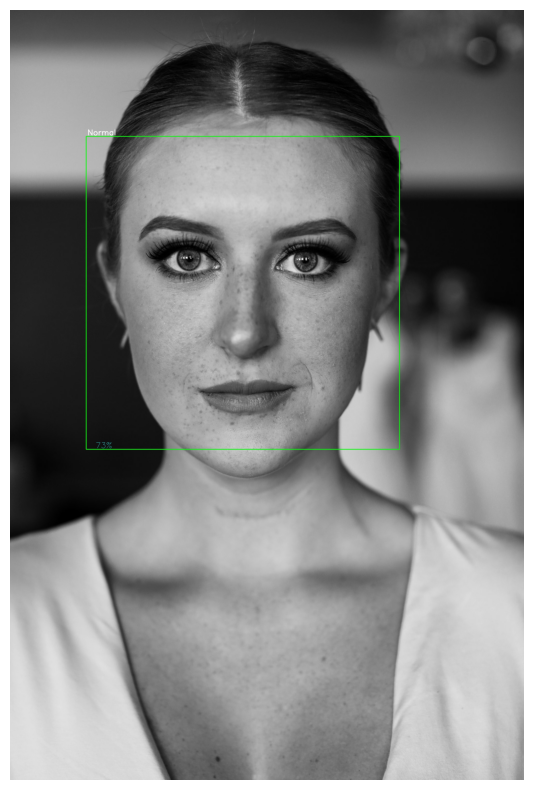

In [28]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("dwayne_johnson.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()